In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
raw_data = pd.read_csv(r'C:\Users\shubh\Downloads\uspollution\pollution_us_2000_2016.csv')

In [27]:
raw_data_copy = raw_data.copy() # just so I don't mess up the real data

In [28]:
raw_data_copy.shape

(1746661, 29)

In [29]:
raw_data_copy.iloc[156656]

Unnamed: 0                                  65010
State Code                                     36
County Code                                    81
Site Num                                       97
Address              56TH AVE AT SPRINGFIELD BLVD
State                                    New York
County                                     Queens
City                                     New York
Date Local                             2001-08-14
NO2 Units                       Parts per billion
NO2 Mean                                    16.75
NO2 1st Max Value                              48
NO2 1st Max Hour                               21
NO2 AQI                                        45
O3 Units                        Parts per million
O3 Mean                                  0.037625
O3 1st Max Value                            0.068
O3 1st Max Hour                                12
O3 AQI                                         77
SO2 Units                       Parts per billion


In [30]:
(raw_data_copy.isna().sum()/len(raw_data_copy)*100) # %age of NA values in each column

Unnamed: 0            0.000000
State Code            0.000000
County Code           0.000000
Site Num              0.000000
Address               0.000000
State                 0.000000
County                0.000000
City                  0.000000
Date Local            0.000000
NO2 Units             0.000000
NO2 Mean              0.000000
NO2 1st Max Value     0.000000
NO2 1st Max Hour      0.000000
NO2 AQI               0.000000
O3 Units              0.000000
O3 Mean               0.000000
O3 1st Max Value      0.000000
O3 1st Max Hour       0.000000
O3 AQI                0.000000
SO2 Units             0.000000
SO2 Mean              0.000000
SO2 1st Max Value     0.000000
SO2 1st Max Hour      0.000000
SO2 AQI              49.975754
CO Units              0.000000
CO Mean               0.000000
CO 1st Max Value      0.000000
CO 1st Max Hour       0.000000
CO AQI               49.999571
dtype: float64

In [31]:
columns_to_observe = list(range(1, 9))+[23, 28]
columns_to_observe

[1, 2, 3, 4, 5, 6, 7, 8, 23, 28]

In [32]:
raw_data_copy.iloc[:, columns_to_observe].head(10) 

,State Code,County Code,Site Num,Address,State,County,City,Date Local,SO2 AQI,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,13.0,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,13.0,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,NaN,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,NaN,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,4.0,NaN
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,4.0,26.0
6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,NaN,NaN
7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,NaN,26.0
8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,16.0,NaN
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,16.0,28.0


In [33]:
raw_data_copy.Address.value_counts().head() # number of instances of each address

PIKE AVE AT RIVER ROAD          35332
1130 EASTWAY DRIVE              32012
5888 MISSION BLVD., RUBIDOUX    30178
1630 N MAIN ST, LOS ANGELES     25225
2956-A TREAT BOULEVARD          23686
Name: Address, dtype: int64

In [34]:
raw_data_copy[raw_data_copy['Site Num'] == 3002].Address.value_counts() #Same site num has 2 address values

1645 E ROOSEVELT ST-CENTRAL PHOENIX STN    22568
1167 NORTH DOVER ROAD                       2572
Name: Address, dtype: int64

In [35]:
raw_data_copy['State County Site Code'] = raw_data_copy['State Code'].astype(str) + '-' + raw_data_copy['County Code'].astype(str) + '-' + raw_data_copy['Site Num'].astype(str)
raw_data_copy.tail() # Added a new column with state, county and site code combined

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,State County Site Code
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0,56-21-100
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN,56-21-100
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0,56-21-100
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN,56-21-100
1746660,24603,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,0.000000,0.0,5,NaN,Parts per million,0.100000,0.100,0,1.0,56-21-100


In [36]:
raw_data_copy['State County Site Code'].value_counts().head()

5-119-7      35332
37-119-41    32012
6-65-8001    30178
6-37-1103    25225
6-13-2       23686
Name: State County Site Code, dtype: int64

In [37]:
raw_data_copy['SO2 AQI'] = raw_data_copy['SO2 AQI'].fillna(raw_data_copy.groupby(['State County Site Code', 'Date Local'])['SO2 AQI'].transform('mean'))

In [38]:
raw_data_copy[['State County Site Code', 'Date Local', 'SO2 AQI']]

,State County Site Code,Date Local,SO2 AQI
0,4-13-3002,2000-01-01,13.0
1,4-13-3002,2000-01-01,13.0
2,4-13-3002,2000-01-01,13.0
3,4-13-3002,2000-01-01,13.0
4,4-13-3002,2000-01-02,4.0
5,4-13-3002,2000-01-02,4.0
6,4-13-3002,2000-01-02,4.0
7,4-13-3002,2000-01-02,4.0
8,4-13-3002,2000-01-03,16.0
9,4-13-3002,2000-01-03,16.0


In [39]:
raw_data_copy['CO AQI'] = raw_data_copy['CO AQI'].fillna(raw_data_copy.groupby(['State County Site Code', 'Date Local'])['CO AQI'].transform('mean'))

In [40]:
raw_data_copy[['State County Site Code', 'Date Local', 'CO AQI']].head()

,State County Site Code,Date Local,CO AQI
0,4-13-3002,2000-01-01,25.0
1,4-13-3002,2000-01-01,25.0
2,4-13-3002,2000-01-01,25.0
3,4-13-3002,2000-01-01,25.0
4,4-13-3002,2000-01-02,26.0


In [41]:
raw_data_copy = raw_data_copy.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num'], axis = 1)

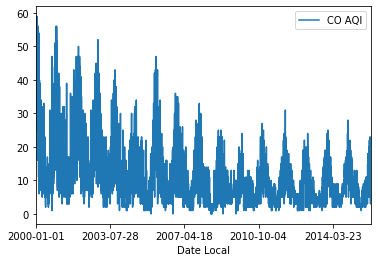

In [45]:
raw_data_copy[raw_data_copy['State County Site Code'] == '4-13-3002'].plot(x = 'Date Local', y = 'CO AQI')